In [1]:
##import library_name
##output = library_name.function_name(input)

In [2]:
pwd


'/Users/armcdona/Desktop/cms-workshop'

In [3]:
ls


Lesson 3.ipynb      cms-workshop.ipynb  data.zip
Untitled.ipynb      data/


In [4]:
ls data


benzene.xyz                sapt.out
distance_data_headers.csv  water.xyz
outfiles/


In [6]:
import os
outfile_directory = os.path.join("data", "outfiles")

In [7]:
print(outfile_directory)

data/outfiles


In [8]:
file_location = os.path.join(outfile_directory,"*.out")
print(file_location)

data/outfiles/*.out


In [9]:
import glob 
filenames = glob.glob(file_location)
print(filenames)

['data/outfiles/propanol.out', 'data/outfiles/pentanol.out', 'data/outfiles/decanol.out', 'data/outfiles/methanol.out', 'data/outfiles/octanol.out', 'data/outfiles/ethanol.out', 'data/outfiles/hexanol.out', 'data/outfiles/heptanol.out', 'data/outfiles/butanol.out', 'data/outfiles/nonanol.out']


In [10]:
for f in filenames:
    outfile = open(f,'r')
    data = outfile.readlines()
    outfile.close()
    for line in data:
        if 'Final Energy' in line:
            energy_line = line
            words = energy_line.split()
            energy = float(words[3])
            print(energy)

-193.12836249728798
-271.20138119895074
-466.3836241400086
-115.04800861868374
-388.3110864554743
-154.09130176573018
-310.2385332251633
-349.27397687072676
-232.1655798347283
-427.3465180082815


In [13]:
first_file = filenames[0]
print(first_file)


data/outfiles/propanol.out


In [14]:
file_name = os.path.basename(first_file)
print(file_name)

propanol.out


In [19]:
split_filename = file_name.split('.')
#print(split_filename)
molecule_name = split_filename[0]
print(molecule_name)

propanol


In [20]:
for f in filenames:
    # pull all molecule names 
    file_name = os.path.basename(f)
    split_filename = file_name.split('.')
    molecule_name = split_filename[0]
    
    # read in all files
    outfile = open(f,'r')
    data = outfile.readlines()
    outfile.close()
    
    # pull the energy value, link to molecule names
    for line in data:
        if 'Final Energy' in line:
            energy_line = line
            words = energy_line.split()
            energy = float(words[3])
            print(molecule_name, energy)

propanol -193.12836249728798
pentanol -271.20138119895074
decanol -466.3836241400086
methanol -115.04800861868374
octanol -388.3110864554743
ethanol -154.09130176573018
hexanol -310.2385332251633
heptanol -349.27397687072676
butanol -232.1655798347283
nonanol -427.3465180082815


In [22]:
datafile = open('energies.txt','w+')
for f in filenames:
    # pull all molecule names 
    file_name = os.path.basename(f)
    split_filename = file_name.split('.')
    molecule_name = split_filename[0]
    
    # read in all files
    outfile = open(f,'r')
    data = outfile.readlines()
    outfile.close()
    
    # pull the energy value, link to molecule names
    for line in data:
        if 'Final Energy' in line:
            energy_line = line
            words = energy_line.split()
            energy = float(words[3])
            print(molecule_name, energy)
            datafile.write(F'{molecule_name} \t {energy:.6f} \n')
            
datafile.close()

propanol -193.12836249728798
pentanol -271.20138119895074
decanol -466.3836241400086
methanol -115.04800861868374
octanol -388.3110864554743
ethanol -154.09130176573018
hexanol -310.2385332251633
heptanol -349.27397687072676
butanol -232.1655798347283
nonanol -427.3465180082815


In [23]:
import numpy
help(numpy.genfromtxt)

Help on function genfromtxt in module numpy:

genfromtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, skip_header=0, skip_footer=0, converters=None, missing_values=None, filling_values=None, usecols=None, names=None, excludelist=None, deletechars=None, replace_space='_', autostrip=False, case_sensitive=True, defaultfmt='f%i', unpack=None, usemask=False, loose=True, invalid_raise=True, max_rows=None, encoding='bytes')
    Load data from a text file, with missing values handled as specified.
    
    Each line past the first `skip_header` lines is split at the `delimiter`
    character, and characters following the `comments` character are discarded.
    
    Parameters
    ----------
    fname : file, str, pathlib.Path, list of str, generator
        File, filename, list, or generator to read.  If the filename
        extension is `.gz` or `.bz2`, the file is first decompressed. Note
        that generators must return byte strings in Python 3k.  The strings
        in a 

In [24]:
distance_file = os.path.join("data", "distance_data_headers.csv")

distances = numpy.genfromtxt(fname=distance_file, delimiter=',', dtype='unicode')
print(distances)

[['Frame' 'THR4_ATP' 'THR4_ASP' 'TYR6_ATP' 'TYR6_ASP']
 ['1' '8.9542' '5.8024' '11.5478' '9.9557']
 ['2' '8.6181' '6.0942' '13.9594' '11.6945']
 ...
 ['9998' '8.6625' '7.7306' '9.5469' '10.3063']
 ['9999' '9.2456' '7.8886' '9.8151' '10.7564']
 ['10000' '8.8135' '7.917' '9.9517' '10.7848']]


In [25]:
headers = distances[0]
print(headers)

['Frame' 'THR4_ATP' 'THR4_ASP' 'TYR6_ATP' 'TYR6_ASP']


In [26]:
# Extract the numerical data (everything but the header!)
data = distances[1:]
print(data)

[['1' '8.9542' '5.8024' '11.5478' '9.9557']
 ['2' '8.6181' '6.0942' '13.9594' '11.6945']
 ['3' '9.0066' '6.0637' '13.0924' '11.3043']
 ...
 ['9998' '8.6625' '7.7306' '9.5469' '10.3063']
 ['9999' '9.2456' '7.8886' '9.8151' '10.7564']
 ['10000' '8.8135' '7.917' '9.9517' '10.7848']]


In [27]:
data = float(data)

TypeError: only size-1 arrays can be converted to Python scalars

In [28]:
data = data.astype(numpy.float)
print(data)

[[1.00000e+00 8.95420e+00 5.80240e+00 1.15478e+01 9.95570e+00]
 [2.00000e+00 8.61810e+00 6.09420e+00 1.39594e+01 1.16945e+01]
 [3.00000e+00 9.00660e+00 6.06370e+00 1.30924e+01 1.13043e+01]
 ...
 [9.99800e+03 8.66250e+00 7.73060e+00 9.54690e+00 1.03063e+01]
 [9.99900e+03 9.24560e+00 7.88860e+00 9.81510e+00 1.07564e+01]
 [1.00000e+04 8.81350e+00 7.91700e+00 9.95170e+00 1.07848e+01]]


In [30]:
data[0]

array([ 1.    ,  8.9542,  5.8024, 11.5478,  9.9557])

In [31]:
len(data[0])

5

In [32]:
data[:, 0]

array([1.000e+00, 2.000e+00, 3.000e+00, ..., 9.998e+03, 9.999e+03,
       1.000e+04])

In [33]:
x = data[:,0]

In [34]:
len(x)

10000

In [35]:
x[2]

3.0

In [36]:
print(x)

[1.000e+00 2.000e+00 3.000e+00 ... 9.998e+03 9.999e+03 1.000e+04]


In [37]:
x[2]

3.0

In [38]:
data[0]

array([ 1.    ,  8.9542,  5.8024, 11.5478,  9.9557])

In [39]:
data[0][0]

1.0

In [40]:
data[0,0]

1.0

In [41]:
data[0,1]

8.9542

In [42]:
#small_data = data[start:end, start:end]
small_data = data[0:10,0:3]
print(small_data)

[[ 1.      8.9542  5.8024]
 [ 2.      8.6181  6.0942]
 [ 3.      9.0066  6.0637]
 [ 4.      9.2002  6.0227]
 [ 5.      9.1294  5.9365]
 [ 6.      9.0462  6.2553]
 [ 7.      8.8657  5.9186]
 [ 8.      9.3256  6.2351]
 [ 9.      9.4184  6.1993]
 [10.      9.06    6.0478]]


In [43]:
small_data2 = data[:,0]
print(small_data2)

[1.000e+00 2.000e+00 3.000e+00 ... 9.998e+03 9.999e+03 1.000e+04]


In [51]:
data[:, [0, 3] ]

array([[1.00000e+00, 1.15478e+01],
       [2.00000e+00, 1.39594e+01],
       [3.00000e+00, 1.30924e+01],
       ...,
       [9.99800e+03, 9.54690e+00],
       [9.99900e+03, 9.81510e+00],
       [1.00000e+04, 9.95170e+00]])

In [52]:
#data_average = numpy.mean(data_set)
thr4_atp = data[:,1]
print(thr4_atp)

[8.9542 8.6181 9.0066 ... 8.6625 9.2456 8.8135]


In [53]:
avg_thr4_atp = numpy.mean(thr4_atp)
print(avg_thr4_atp)

10.876950930000001


In [54]:
num_columns = len(data[0,:])
print(num_columns)

5


In [55]:
num_columns = len(data[10,:])
print(num_columns)

5


In [56]:
for i in range(1,num_columns):
    column = data[:,i]
    avg_col = numpy.mean(column)
    print(avg_col)
    

10.876950930000001
7.342344959999999
11.209791329999998
10.9934435


In [57]:
for i in range(1,num_columns):
    column = data[:,i]
    avg_col = numpy.mean(column)
    print(F'{headers[i]} {avg_col}')

THR4_ATP 10.876950930000001
THR4_ASP 7.342344959999999
TYR6_ATP 11.209791329999998
TYR6_ASP 10.9934435


In [58]:
import matplotlib.pyplot

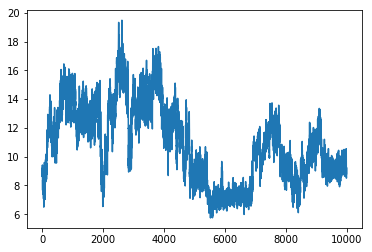

In [59]:
#initialize a figure
matplotlib.pyplot.figure()
matplotlib.pyplot.plot(data[:,1])

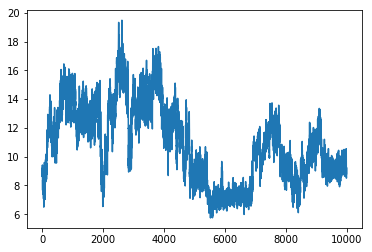

In [60]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(data[:,1])

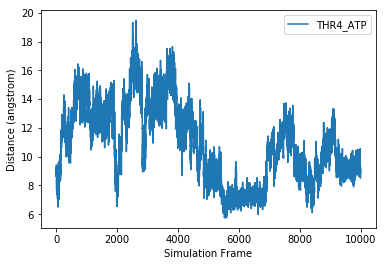

In [64]:
sample = headers[1]

plt.figure()
plt.xlabel('Simulation Frame')
plt.ylabel('Distance (angstrom)')

fig_1 = plt.plot(data[:,1], label=sample)

plt.legend()

plt.savefig(F'{sample}.png', dpi=300)

In [63]:
ls

Lesson 3.ipynb      Untitled.ipynb      data/               energies.txt
THR4_ATP.png        cms-workshop.ipynb  data.zip


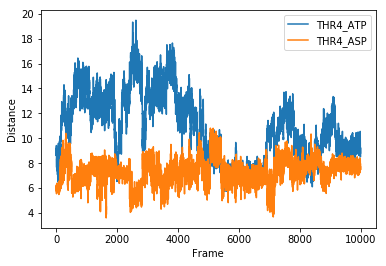

In [65]:
plt.figure()
plt.xlabel('Frame')
plt.ylabel('Distance')
plt.plot(data[:,1], label=headers[1])
plt.plot(data[:,2], label=headers[2])
plt.legend()

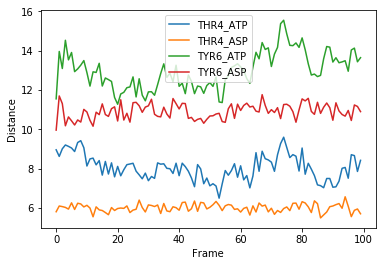

In [68]:
plt.figure()
plt.xlabel('Frame')
plt.ylabel('Distance')
for col in range(1, len(data[0,:])):
    plt.plot(data[0:100 , col], label=headers[col])
plt.legend()

In [69]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

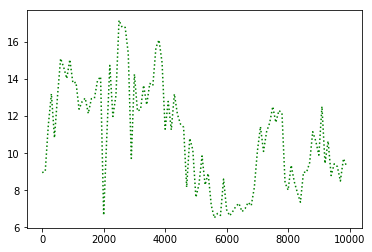

In [82]:
plt.plot(data[0::100,0], data[0::100,1], ':')

In [71]:
print(data[0:10:2, :])

[[ 1.      8.9542  5.8024 11.5478  9.9557]
 [ 3.      9.0066  6.0637 13.0924 11.3043]
 [ 5.      9.1294  5.9365 13.5321 10.6279]
 [ 7.      8.8657  5.9186 12.9312 10.2176]
 [ 9.      9.4184  6.1993 13.2614 10.366 ]]
